In [9]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-25 20:04:35--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.1s    

2022-09-25 20:04:36 (10.5 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [23]:
import pandas as pd 
df=pd.read_csv("housing.csv")

In [24]:
col=['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity',
]
df=df[col]

In [25]:
df.head(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [27]:
df=df.fillna(0)

In [28]:
df["rooms_per_household"]=df["total_rooms"]/df["households"]
df["bedrooms_per_room"]=df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]


What is the most frequent observation (mode) for the column ocean_proximity?

Options:

* NEAR BAY
* <1H OCEAN
* INLAND
* NEAR OCEAN

In [29]:
list(df["ocean_proximity"].value_counts().sort_values(ascending=False)[:1].index)

['<1H OCEAN']

Q Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?
Options:

* total_bedrooms and households
* total_bedrooms and total_rooms
* population and households
* population_per_household and total_rooms

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [31]:
del df_train

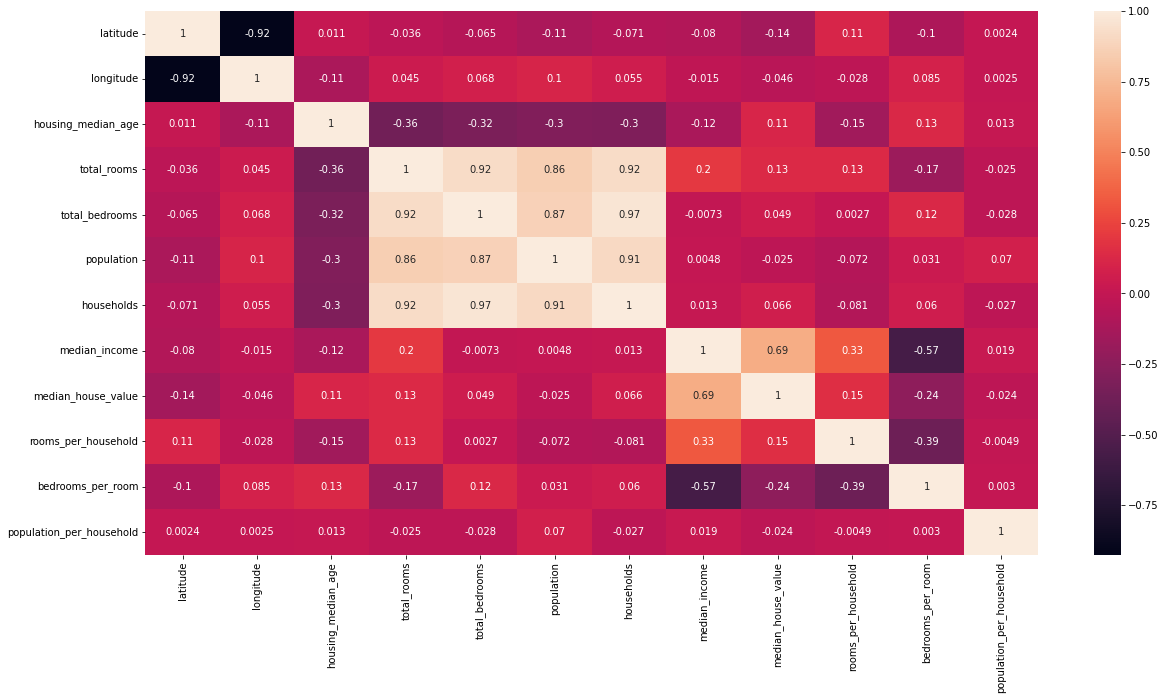

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.select_dtypes(include="float64").corr(),annot=True)

plt.show()

#Total bedrooms and total rooms 0.92

Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [34]:
mean=df.median_house_value.mean()
def highorlow(val):
    if val> mean :
        return 1 
    else :
        return 0


In [35]:
df["above_average"]=df['median_house_value'].map(highorlow)

In [36]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0


In [39]:
my_cols = set(df.columns)
my_cols.remove("median_house_value")

X=df[my_cols]
y=df.median_house_value

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Mutual information

In [42]:
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder

In [43]:
X_train

,total_rooms,median_income,population_per_household,population,latitude,housing_median_age,longitude,bedrooms_per_room,households,total_bedrooms,above_average,rooms_per_household,ocean_proximity
17244,1467.0,2.3681,3.754011,1404.0,34.43,39.0,-119.67,0.259714,374.0,381.0,1,3.922460,<1H OCEAN
8817,6097.0,10.1357,2.789082,2248.0,33.74,24.0,-118.32,0.130228,806.0,794.0,1,7.564516,NEAR OCEAN
19686,1317.0,1.6719,2.540059,856.0,39.13,41.0,-121.62,0.234624,337.0,309.0,0,3.908012,INLAND
3545,4759.0,4.8333,2.059016,1884.0,34.24,9.0,-118.63,0.194158,915.0,924.0,1,5.201093,<1H OCEAN
17019,2769.0,5.5902,2.516456,994.0,37.52,38.0,-122.30,0.139762,395.0,387.0,1,7.010127,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,1867.0,3.3427,1.909639,951.0,33.79,16.0,-118.29,0.305838,498.0,571.0,0,3.748996,<1H OCEAN
16339,3295.0,3.6083,3.956597,2279.0,38.04,16.0,-121.34,0.171472,576.0,565.0,0,5.720486,INLAND
14965,3341.0,3.9844,3.242525,1952.0,32.74,18.0,-116.99,0.182879,602.0,611.0,1,5.549834,<1H OCEAN
11117,1545.0,4.5112,2.085714,730.0,33.84,16.0,-117.87,0.229126,350.0,354.0,0,4.414286,<1H OCEAN


In [47]:
ohe=OneHotEncoder().fit(X_train[["ocean_proximity"]])
transformed=ohe.transform(X_train[["ocean_proximity"]])


In [48]:
ohe.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [49]:
transformed.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [50]:
X_train[ohe.categories_[0]]=transformed.toarray()


In [51]:
ohe_val=OneHotEncoder().fit(X_val[["ocean_proximity"]])
transformed_val=ohe.transform(X_val[["ocean_proximity"]])
X_val[ohe_val.categories_[0]]=transformed_val.toarray()

In [52]:
X_train.drop(columns=["ocean_proximity"],inplace=True)
X_val.drop(columns=["ocean_proximity"],inplace=True)

In [53]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, old_y_train)

In [ ]:
print(X_val.shape)
print(X_train.shape)

In [60]:
import numpy as np 
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict(X_val)
accuracy = np.round(accuracy_score(old_y_val, y_pred),2)
print(accuracy)

Q6 Linear regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [65]:
old_y_train=y_train
old_y_val=y_val

In [66]:
y_train= np.log(y_train)
y_val= np.log(y_val)

In [ ]:
orig_score=accuracy
features=list(X_train.columns)
for c in features:
    subset = features.copy()
    subset.remove(c)
    model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
    model.fit(X_train, old_y_train)
    y_pred = model.predict(X_val)

    score = accuracy_score(old_y_val, y_pred)
    print(c, orig_score - score, score)


In [67]:
X_train

,total_rooms,median_income,population_per_household,population,latitude,housing_median_age,longitude,bedrooms_per_room,households,total_bedrooms,above_average,rooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17244,1467.0,2.3681,3.754011,1404.0,34.43,39.0,-119.67,0.259714,374.0,381.0,1,3.922460,1.0,0.0,0.0,0.0,0.0
8817,6097.0,10.1357,2.789082,2248.0,33.74,24.0,-118.32,0.130228,806.0,794.0,1,7.564516,0.0,0.0,0.0,0.0,1.0
19686,1317.0,1.6719,2.540059,856.0,39.13,41.0,-121.62,0.234624,337.0,309.0,0,3.908012,0.0,1.0,0.0,0.0,0.0
3545,4759.0,4.8333,2.059016,1884.0,34.24,9.0,-118.63,0.194158,915.0,924.0,1,5.201093,1.0,0.0,0.0,0.0,0.0
17019,2769.0,5.5902,2.516456,994.0,37.52,38.0,-122.30,0.139762,395.0,387.0,1,7.010127,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,1867.0,3.3427,1.909639,951.0,33.79,16.0,-118.29,0.305838,498.0,571.0,0,3.748996,1.0,0.0,0.0,0.0,0.0
16339,3295.0,3.6083,3.956597,2279.0,38.04,16.0,-121.34,0.171472,576.0,565.0,0,5.720486,0.0,1.0,0.0,0.0,0.0
14965,3341.0,3.9844,3.242525,1952.0,32.74,18.0,-116.99,0.182879,602.0,611.0,1,5.549834,1.0,0.0,0.0,0.0,0.0
11117,1545.0,4.5112,2.085714,730.0,33.84,16.0,-117.87,0.229126,350.0,354.0,0,4.414286,1.0,0.0,0.0,0.0,0.0


In [ ]:
for i in [0, 0.01, 0.1, 1, 10]:
    lmodel = Ridge(alpha=a, solver="sag", random_state=42)
    lmodel.fit(X_train,y_train)
    y_pred = lmodel.predict(X_val)
    
    score = np.sqrt(mean_squared_error(old_y_val, y_pred))
    
    print(a, round(score, 3))

If there are multiple options, select the smallest alpha.

Options:

0
0.01
0.1
1
10